# Logistic regression metrics

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
import pandas as pd
binarie = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
## view the first few rows of the data
binarie.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
binarie["rank"] = binarie["rank"].astype("category")
binarie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   admit   400 non-null    int64   
 1   gre     400 non-null    int64   
 2   gpa     400 non-null    float64 
 3   rank    400 non-null    category
dtypes: category(1), float64(1), int64(2)
memory usage: 10.1 KB


In [4]:
# Logistic model
import statsmodels.formula.api as smf
glm = smf.logit("admit~gre+gpa+rank", data = binarie).fit(disp=False)

## Coefficients

In [5]:
from scientistmetrics import coefficients
coefficients(glm)

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-3.989979,1.139951,-3.500132,0.000465,-6.224242,-1.755716
rank[T.2],-0.675443,0.316490,-2.134171,0.032829,-1.295751,-0.055135
rank[T.3],-1.340204,0.345306,-3.881202,0.000104,-2.016992,-0.663416
rank[T.4],-1.551464,0.417832,-3.713131,0.000205,-2.370399,-0.732529
gre,0.002264,0.001094,2.069863,0.038465,0.000120,0.004409
gpa,0.804038,0.331819,2.423119,0.015388,0.153684,1.454391


## Metrics with logistic model

### R2

#### McFadden R2

In [6]:
from scientistmetrics import r2_mcfadden
r2_mcfadden(glm)

0.08292194470084713

#### Adjusted McFadden R2

In [7]:
r2_mcfadden(glm,adjust=True)

0.066921193229454

#### Coxsnell R2

In [8]:
from scientistmetrics import r2_coxsnell
r2_coxsnell(glm)

0.09845702133885237

#### Count R2

In [9]:
from scientistmetrics import r2_count
r2_count(glm)

0.71

#### Adjusted Count R2

In [10]:
from scientistmetrics import r2_count_adj
r2_count_adj(glm)

0.08661417322834646

#### Efron R2

In [11]:
from scientistmetrics import r2_efron
r2_efron(glm)

0.1014324863895315

#### Kullback R2

In [12]:
from scientistmetrics import r2_kullback
r2_kullback(glm)

0.071283898313802

#### Mckelvey R2

In [13]:
from scientistmetrics import r2_mckelvey
r2_mckelvey(glm)

0.006682730898547062

#### Nagelkerke R2

In [14]:
from scientistmetrics import r2_nagelkerke
r2_nagelkerke(glm)

0.13799580151192056

#### Somers R2

In [15]:
from scientistmetrics import r2_somers
r2_somers(glm)

SomersDResult(statistic=0.16662340284387528, pvalue=5.331002154717063e-05, table=array([[254,  19],
       [ 97,  30]]))

#### Tjur R2

In [16]:
from scientistmetrics import r2_tjur
r2_tjur(glm)

0.10178650650542126

#### Recall score

In [17]:
from scientistmetrics import recall_score
recall_score(glm)

0.23622047244094488

#### Accuracy score

In [18]:
from scientistmetrics import accuracy_score
accuracy_score(glm)

0.71

#### Average precision score

In [19]:
from scientistmetrics import average_precision_score
average_precision_score(glm)

0.5127557198205451

#### Balanced accuracy score

In [20]:
from scientistmetrics import balanced_accuracy_score
balanced_accuracy_score(glm)

0.5833117014219377

#### Brier score loss

In [21]:
from scientistmetrics import brier_score_loss
brier_score_loss(glm)

0.19471396415242848

#### Error rate

In [22]:
from scientistmetrics import error_rate
error_rate(glm)

0.29000000000000004

#### AIC

In [23]:
from scientistmetrics import extractAIC
extractAIC(glm)

470.51749247589896

#### AICC

In [24]:
from scientistmetrics import extractAICC
extractAICC(glm)

470.7312329339142

#### BIC

In [25]:
from scientistmetrics import extractBIC
extractBIC(glm)

494.4662797585469

#### f1 score

In [26]:
from scientistmetrics import f1_score
f1_score(glm)

0.3409090909090909

#### Precision score

In [27]:
from scientistmetrics import precision_score
precision_score(glm)

0.6122448979591837

#### ggroc

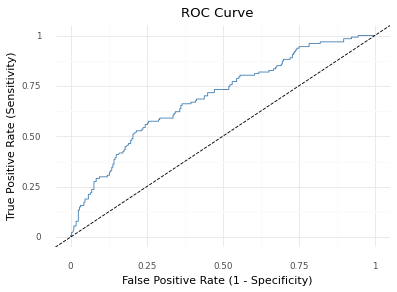

In [28]:
from scientistmetrics import ggroc
p = ggroc(glm)
print(p)

#### Roc AUC

In [29]:
from scientistmetrics import roc_auc_score
roc_auc_score(glm)

0.6928412794554527

#### Hosmer Lemeshow test

In [30]:
from scientistmetrics import HosmerLemeshowTest
HosmerLemeshowTest(glm)

HosmerLemeshowResult(statistic=11.08547199669248, df_denom=8, pvalue=0.1969031159278586)

#### Likelihood ratio test

In [31]:
from scientistmetrics import LikelihoodRatioTest
LikelihoodRatioTest(glm)

LikelihoodRatioTestResult(statistic=41.45902514596207, pvalue=7.578193995643944e-08)

In [32]:
glm2 = smf.logit("admit~gre+gpa", data = binarie).fit(disp=False)
LikelihoodRatioTest(glm,glm2)

LikelihoodRatioTestResult(statistic=21.826489208929843, df_denom=3.0, pvalue=7.088456177668665e-05)

#### Log loss

In [33]:
from scientistmetrics import log_loss
log_loss(glm)

10.452659482843973

#### Log - likelihood

In [34]:
from scientistmetrics import logLik
logLik(glm)

-229.25874623794948

#### Man Withney Test

In [35]:
from scientistmetrics import MannWhitneyTest
MannWhitneyTest(glm)

MannWhitneyResult(statistic=-0.6678622859927071, pvalue=0.747889248394069)

## Autocorrelation test

In [36]:
from scientistmetrics import check_autocorrelation

### Durbin watson

In [37]:
check_autocorrelation(glm,test ="dw")

1.9478844329870433

#### Feasible GLS - Cochrane Orcutt Procedure

In [38]:
check_autocorrelation(glm,test="corc")

{'coef':           Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
 const -0.266904  0.216260 -1.234179  0.217874 -0.692075  0.158268
 x1    -0.162668  0.067832 -2.398084  0.016947 -0.296027 -0.029308
 x2    -0.289009  0.070413 -4.104479  0.000049 -0.427442 -0.150575
 x3    -0.324580  0.079494 -4.083091  0.000054 -0.480866 -0.168294
 x4     0.000419  0.000212  1.976584  0.048787  0.000002  0.000836
 x5     0.159809  0.064172  2.490336  0.013174  0.033646  0.285971,
 'rho': 0.021508516957747754}

## Residuals

In [39]:
from scientistmetrics import residuals

#### Model residuals

In [40]:
residuals(glm,choice="response")

0     -0.172627
1      0.707825
2      0.261592
3      0.821615
4     -0.118354
         ...   
395   -0.488670
396   -0.165504
397   -0.181062
398   -0.463667
399   -0.300731
Length: 400, dtype: float64

#### Pearsn residuals

In [41]:
residuals(glm,choice="pearson")

0     -0.456776
1      1.556473
2      0.595201
3      2.146128
4     -0.366390
         ...   
395   -0.977591
396   -0.445341
397   -0.470206
398   -0.929793
399   -0.655793
Length: 400, dtype: float64

#### Deviance residuals

In [42]:
residuals(glm,choice="deviance")

0     -0.615628
1      1.568695
2      0.778792
3      1.856779
4     -0.501925
         ...   
395   -1.158223
396   -0.601544
397   -0.632056
398   -1.116244
399   -0.845836
Length: 400, dtype: float64

### Standardized residuals

In [43]:
from scientistmetrics import rstandard
rstandard(glm,choice="pearson")

0     -0.461237
1      1.564306
2      0.602817
3      2.164422
4     -0.369655
         ...   
395   -0.984692
396   -0.447855
397   -0.474159
398   -0.934095
399   -0.659804
Length: 400, dtype: float64

In [44]:
rstandard(glm,choice="deviance")

0     -0.621641
1      1.576591
2      0.788757
3      1.872606
4     -0.506397
         ...   
395   -1.166635
396   -0.604941
397   -0.637369
398   -1.121409
399   -0.851009
Length: 400, dtype: float64

### Student residuals

In [45]:
from scientistmetrics import rstudent
rstudent(glm)

0     -0.618946
1      1.576468
2      0.784628
3      1.877893
4     -0.504313
         ...   
395   -1.164222
396   -0.603408
397   -0.635002
398   -1.119830
399   -0.848949
Length: 400, dtype: float64

### Model performance

In [46]:
from scientistmetrics import model_performance
model_performance(glm,metrics="all")

AIC                 470.517492
AICC                470.731233
BIC                 494.466280
accuracy              0.710000
r2 mcfadden           0.082922
r2 mcfadden adj.      0.066921
r2 coxsnell           0.098457
r2 naglekerke         0.137996
r2 efron              0.101432
r2 mckelvey           0.006683
r2 count              0.710000
r2 count adj.         0.086614
r2 tjur               0.101787
precision             0.612245
recall                0.236220
f1 score              0.340909
auc                   0.692841
Name: statistics, dtype: float64

## Model compare

In [47]:
from scientistmetrics import compare_performance
compare_performance(model=[glm,glm2])

,Name,aic,aicc,bic,Log-Likelihood,pseudo r2,coxsnell r2,nagelkerke r2,accuracy,recall,precision,f1 score,log loss,auc
Model 1,logit,470.517492,470.731233,494.466280,-229.258746,0.082922,0.098457,0.137996,0.71,0.236220,0.612245,0.340909,10.452659,0.692841
Model 2,logit,486.343982,486.404588,498.318375,-240.171991,0.039267,0.047896,0.067131,0.68,0.070866,0.473684,0.123288,11.533969,0.635416


## Power set model

In [48]:
# Powerset model
from scientistmetrics import powersetmodel
glm_res = powersetmodel(DTrain=binarie,target="admit",split_data=False,model_type="logistic")
# All metrics
glm_metrics = glm_res[1]
glm_metrics

,predictor,count,aic,aicc,bic,r2 mcfadden,r2 cox - snell,r2 nagelkerke,null deviance,resid deviance,...,recall score,f1 score,auc,sensibility,precision,specificity,False Pos. rate,younden index,likelihood ratio,likelihood test ratio
0,gre,1,490.056138,490.086364,498.039067,0.027842,0.034202,0.047937,499.976518,486.056138,...,0.000000,0.000000,0.609371,0.000000,NaN,1.000000,0.000000,0.000000,NaN,27.538645
1,gpa,1,490.967623,490.997849,498.950552,0.026019,0.031999,0.044849,499.976518,486.967623,...,0.000000,0.000000,0.618586,0.000000,NaN,1.000000,0.000000,0.000000,NaN,28.450130
2,rank,1,482.966718,483.067984,498.932577,0.050022,0.060610,0.084950,499.976518,474.966718,...,0.259843,0.351064,0.644054,0.259843,0.540984,0.897436,0.102564,0.157278,2.533465,16.449226
3,gpa+gre,2,486.343982,486.404588,498.318375,0.039267,0.047896,0.067131,499.976518,480.343982,...,0.070866,0.123288,0.635416,0.070866,0.473684,0.963370,0.036630,0.034236,1.934646,21.826489
4,rank+gre,2,474.531788,474.684072,494.489111,0.070893,0.084799,0.118853,499.976518,464.531788,...,0.212598,0.306818,0.676415,0.212598,0.551020,0.919414,0.080586,0.132012,2.638153,6.014295
5,rank+gpa,2,472.875252,473.027536,492.832575,0.074206,0.088582,0.124155,499.976518,462.875252,...,0.267717,0.382022,0.680107,0.267717,0.666667,0.937729,0.062271,0.205445,4.299213,4.357759
6,rank+gpa+gre,3,470.517492,470.731233,494.466280,0.082922,0.098457,0.137996,499.976518,458.517492,...,0.236220,0.340909,0.692841,0.236220,0.612245,0.930403,0.069597,0.166623,3.394115,0.000000
